In [176]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import scipy
from PIL import Image
import random
from scipy import misc
from scipy import ndimage

In [177]:
data_directory_train="F:\Minor 2 alt\Train"
data_directory_test="F:\Minor 2 alt\Test"
categories=["Medicinal","Other"]

In [178]:
resize_array=[200,100]

In [179]:
def create_train_test_set(categories,data_directory):
    list_tr_te_set=[]
    for cat in categories:
        path=os.path.join(data_directory,cat)
        class_num=categories.index(cat)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img),0)
            #plt.imshow(img_array)
            #plt.show()
            new_img=cv2.resize(img_array,(resize_array[0],resize_array[1]))
            list_tr_te_set.append([new_img,class_num])
    return list_tr_te_set

In [180]:
training_data=[]
training_data=create_train_test_set(categories,data_directory_train) #FUNCTION CALL
print(len(training_data))

999


In [181]:
random.shuffle(training_data)

In [182]:
X_tr=[]
Y_tr=[]
for features,labels in training_data:
    X_tr.append(features)
    Y_tr.append(labels)

In [183]:
print(len(X_tr))
print(len(Y_tr))

999
999


In [184]:
X_train=np.array(X_tr).reshape(-1,resize_array[0],resize_array[1],1)
Y_train=np.array(Y_tr)
Y_train=Y_train.reshape(Y_train.shape[0],1)

In [185]:
print(X_train.shape)
print(Y_train.shape)

(999, 200, 100, 1)
(999, 1)


In [186]:
test_data=[]
test_data=create_train_test_set(categories,data_directory_test)

In [187]:
random.shuffle(test_data)
len(test_data)

237

In [188]:
X_te=[]
Y_te=[]
for feat,label in test_data:
    X_te.append(feat)
    Y_te.append(label)

In [189]:
X_test=np.array(X_te).reshape(-1,resize_array[0],resize_array[1],1)
Y_test=np.array(Y_te)
Y_test=Y_test.reshape(Y_test.shape[0],1)

In [190]:
print(X_test.shape)
print(Y_test.shape)

(237, 200, 100, 1)
(237, 1)


In [191]:
print('SHAPE OF TRAINING FEATURES'+"="+str(X_train.shape))
print('SHAPE OF TRAINING LABELS'+"="+str(Y_train.shape))
print('SHAPE OF TEST FEATURES'+"="+str(X_test.shape))
print('SHAPE OF TEST LABELS'+"="+str(Y_test.shape))

SHAPE OF TRAINING FEATURES=(999, 200, 100, 1)
SHAPE OF TRAINING LABELS=(999, 1)
SHAPE OF TEST FEATURES=(237, 200, 100, 1)
SHAPE OF TEST LABELS=(237, 1)


In [192]:
X_train_flatten=X_train.reshape(X_train.shape[0],-1).T
X_test_flatten = X_test.reshape(X_test.shape[0],-1).T
print(X_train_flatten.shape)
print(X_test_flatten.shape)

(20000, 999)
(20000, 237)


In [193]:
X_train_set=X_train_flatten/255
X_test_set=X_test_flatten/255

In [194]:
def activation_sigmoid(Z):
    u=1+np.exp(-Z)
    A=1/u
    a_cache=Z
    return A,a_cache

In [195]:
def activation_relu(Z):
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    cache = Z 
    return A, cache

In [196]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ

In [197]:
def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

In [198]:
def initialize_parameters_deep(layer_dims):    #INITIALIZING WEIGHTS AND BIAS
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters['W' + str(l)]= np.random.randn(layer_dims[l], layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))                
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))    
    return parameters

In [199]:
def linear_forward(A,W,b):
    Z=np.dot(W,A)+b
    assert(Z.shape==(W.shape[0],A.shape[1]))
    cache=(A,W,b)                            #Z,linear_cache=linear_forward(A,W,b)
    return Z,cache

In [200]:
def linear_activation_forward(A_prev, W, b, activation):
    if activation=="Sigmoid":
        Z,linear_cache=linear_forward(A_prev,W,b)
        A,activation_cache=activation_sigmoid(Z)
    elif activation=="Relu":
        Z,linear_cache=linear_forward(A_prev,W,b)                #linear_cache -> (A,W,b)
        A,activation_cache=activation_relu(Z)                    #activation_cache ->(Z)
    assert(A.shape==(W.shape[0],A_prev.shape[1]))
    cache=(linear_cache,activation_cache)
    return A,cache

In [201]:
def L_model_forward(X,parameters):
    caches=[]
    A=X
    L=5
    for a in range(1,L-1):
        A_prev=A
        W=parameters["W"+str(a)]
        B=parameters["b"+str(a)]
        A,cache=linear_activation_forward(A_prev,W,B,activation='Relu') # cache -> (linear_cache, activation)
        caches.append(cache)
    W=parameters["W"+str(L-1)]
    b=parameters["b"+str(L-1)]
    AL,cache=linear_activation_forward(A,W,b,activation="Sigmoid")   # AL -> ACTIVATION LAST LAYER
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))
    return AL,caches

In [202]:
def compute_cost(AL,Y):
    m=Y.shape[1]
    cost = -1/m*np.sum(np.multiply(Y,np.log(AL))+np.multiply(1-Y,np.log(1-AL)))
    cost=np.squeeze(cost)
    assert(cost.shape==())
    return cost

In [203]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1/m*np.dot(dZ,A_prev.T)
    db = 1/m*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    return dA_prev, dW, db

In [204]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        
    elif activation == "Sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    return dA_prev, dW, db

In [205]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))#derivative of sigmoid function
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,activation="Sigmoid")
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

In [206]:
def update_parameters(parameters, grads, learning_rate):
    L = 5 
    for l in range(1,L-1):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]    
    return parameters

In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.009, num_iterations = 2500, print_cost = True):#lr was 0.009
    np.random.seed(1)
    costs = []                         
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X,parameters)
        cost = compute_cost(AL,Y)/1000000
        grads = L_model_backward(AL,Y,caches)
        parameters = update_parameters(parameters,grads,learning_rate)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [208]:
layers_dims=[20000, 20, 7, 5, 1]

Cost after iteration 0: 0.691762
Cost after iteration 100: 0.691760
Cost after iteration 200: 0.691759
Cost after iteration 300: 0.691758
Cost after iteration 400: 0.691758
Cost after iteration 500: 0.691758
Cost after iteration 600: 0.691757
Cost after iteration 700: 0.691757
Cost after iteration 800: 0.691757
Cost after iteration 900: 0.691757
Cost after iteration 1000: 0.691757
Cost after iteration 1100: 0.691757
Cost after iteration 1200: 0.691757
Cost after iteration 1300: 0.691757
Cost after iteration 1400: 0.691757
Cost after iteration 1500: 0.691757
Cost after iteration 1600: 0.691757
Cost after iteration 1700: 0.691757
Cost after iteration 1800: 0.691757
Cost after iteration 1900: 0.691757
Cost after iteration 2000: 0.691757
Cost after iteration 2100: 0.691757
Cost after iteration 2200: 0.691757
Cost after iteration 2300: 0.691757
Cost after iteration 2400: 0.691757


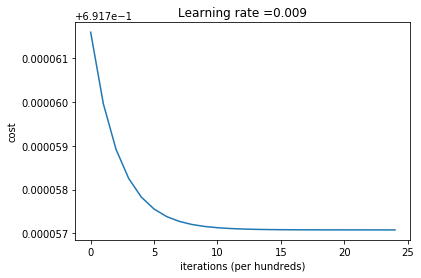

In [209]:
parameters = L_layer_model(X_train_set, Y_train, layers_dims)

In [214]:
def predict(X, y, parameters):
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    probas, caches = L_model_forward(X, parameters)
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
        
    return p

In [ ]:
my_image = "tiger.jpg" 
my_label_y = []
fname = "images/" + my_image
image = cv2.imread(my_image,0)
my_image = cv2.resize(image,(resize_array[0]*resize_array[1]*1,1))
my_image = my_image/255.
new_img=my_image.T
my_predicted_image = predict(new_img, my_label_y, parameters)

plt.imshow(image)
print ("y" + str(my_predicted_image))